In [145]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.pyc'>

# Set Block Path and Load SCGs

In [33]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))
print(scgfss)

['/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170407T230137Z-10.0-5.0-13.0-correct.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170410T215549Z-10.0-5.0-13.0-incorrect.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170322T165428Z-10.0-5.0-13.0.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg']


In [34]:
scgfs = scgfss[-1]
print(scgfs)
with open(scgfs, 'r') as scgf:
    scg = pickle.load(scgf)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170412T224036Z-10.0-5.0-13.0-SampleDistractor.scg


# Choose Stimuli and Trials

In [35]:
scg.keys()

[u'T40S40D3',
 u'T3S8D40',
 u'T3S3D-1',
 u'T40S70D-1',
 u'T3S3D40',
 u'T40S70D3',
 u'T3S8D-1',
 u'T40S40D-1']

In [36]:
stims = [s for s in scg.keys() if s[0] =='T']
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in stims for t in range(5)]
stimtrials
labs = [str(s[0])+ str(s[1]) for s in stimtrials]

In [ ]:
stimtrials = [(s, t) for s in ['T40S40D3', 'T40S70D3', 'T-1S-1D40'] for t in range(10)]
#stimtrials = [(s, t) for s in scg.keys() for t in range(5)]

In [37]:
print(stimtrials)

[(u'T40S40D3', 0), (u'T40S40D3', 1), (u'T40S40D3', 2), (u'T40S40D3', 3), (u'T40S40D3', 4), (u'T3S8D40', 0), (u'T3S8D40', 1), (u'T3S8D40', 2), (u'T3S8D40', 3), (u'T3S8D40', 4), (u'T3S3D-1', 0), (u'T3S3D-1', 1), (u'T3S3D-1', 2), (u'T3S3D-1', 3), (u'T3S3D-1', 4), (u'T40S70D-1', 0), (u'T40S70D-1', 1), (u'T40S70D-1', 2), (u'T40S70D-1', 3), (u'T40S70D-1', 4), (u'T3S3D40', 0), (u'T3S3D40', 1), (u'T3S3D40', 2), (u'T3S3D40', 3), (u'T3S3D40', 4), (u'T40S70D3', 0), (u'T40S70D3', 1), (u'T40S70D3', 2), (u'T40S70D3', 3), (u'T40S70D3', 4), (u'T3S8D-1', 0), (u'T3S8D-1', 1), (u'T3S8D-1', 2), (u'T3S8D-1', 3), (u'T3S8D-1', 4), (u'T40S40D-1', 0), (u'T40S40D-1', 1), (u'T40S40D-1', 2), (u'T40S40D-1', 3), (u'T40S40D-1', 4)]


# Compute JS Divergence

In [38]:
beta = 0.15
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T
pickle.dump(mat, open('B604_P01S15_Lap1_0.15_dmat_AllStims_5Trials_SampleDistractor.pkl', 'w'))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


# Plot JS Divergence

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide


([<matplotlib.axis.YTick at 0x7fe34945e090>,
 <a list of 8 Text yticklabel objects>)

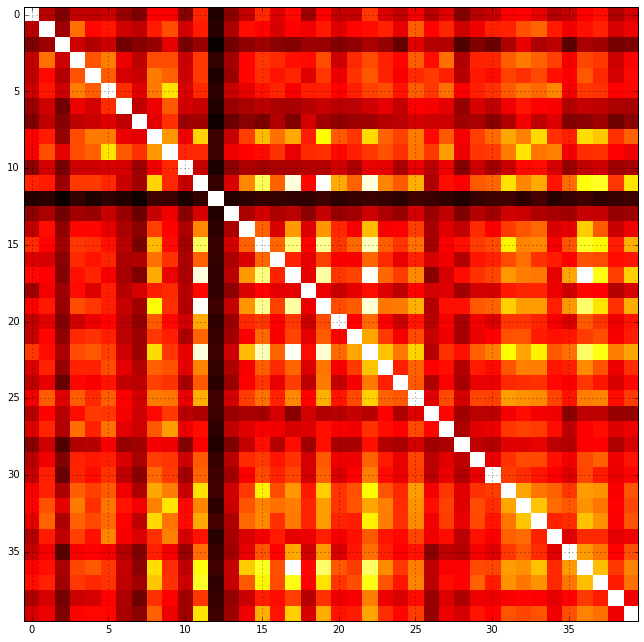

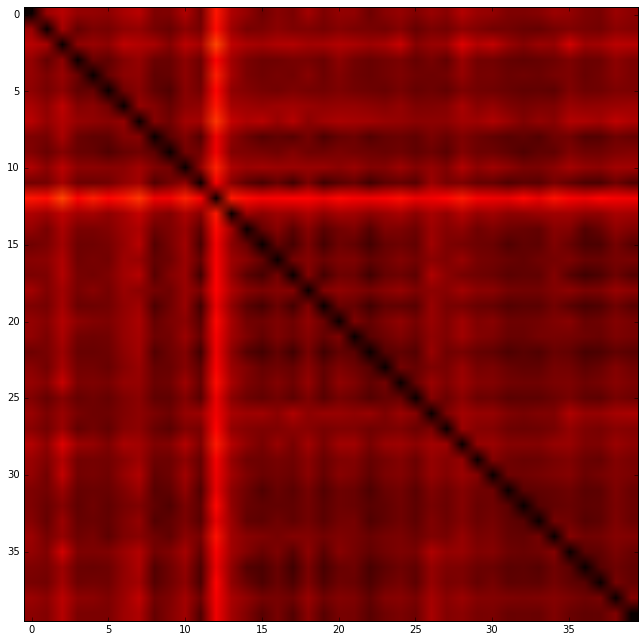

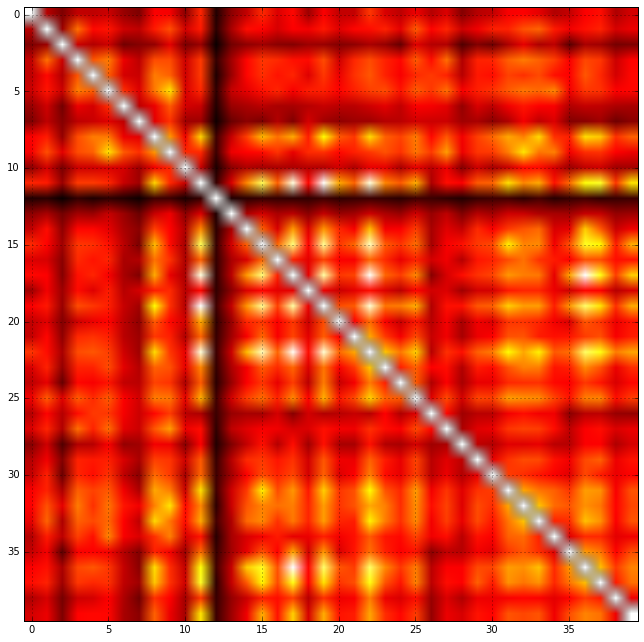

In [39]:

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T
#pickle.dump(mat, open('B604_P01S15_Lap1_0.15_dmat.pkl', 'w'))
import matplotlib.pyplot as plt
%matplotlib inline
ntrials = 5
plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials), ntrials))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))

# Peform Hierarchical Clustering

In [2]:
mat = pickle.load(open('B604_P01S15_Lap1_0.15_dmat_AllStims_10Trials.pkl', 'r'))

In [41]:
noNANmat = np.copy(mat)
noNANmat[np.isnan(noNANmat)] = 0

In [18]:
from scipy.cluster import hierarchy as ha

stimlabels = [str(s[0]) for s in stimtrials]
print(stimlabels)
# First define the leaf label function.
n = len(stimtrials)
def llf(id):
    if id < n:
        return stimlabels[id]
    else:
        return '[%d]' % (id)
    
print(set(stimlabels))

['T40S40D3', 'T40S40D3', 'T40S40D3', 'T40S40D3', 'T40S40D3', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S8D40', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T3S3D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T40S70D-1', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T3S3D40', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T40S70D3', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T3S8D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1', 'T40S40D-1']
set(['T40S40D3', 'T3S8D40', 'T3S3D-1', 'T40S70D-1', 'T3S3D40', 'T40S70D3', 'T3S8D-1', 'T40S40D-1'])


In [9]:
linmat = mat[np.triu_indices(len(stimtrials))]
Z = ha.linkage(linmat, method='complete')
# calculate full dendrogram
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ha.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    leaf_label_func=llf
)
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

In [22]:
# average the distance over trials?
dmat2 = np.zeros((ntrials, ntrials))
for stim in range(ntrials):
    for stim2 in range(10):
        lm0 = stim*ntrials
        lm1 = stim*ntrials +ntrials
        lm2 = stim2*ntrials
        lm3 = stim2*ntrials + ntrials
        dmat2[stim, stim2] = np.mean(noNANmat[lm0:lm1, lm2:lm3])

def llf(x):
    if x < ntrials:
        return list(set(stimlabels))[x]
    else:
        return '[%d]' % (x)

IndexError: index 5 is out of bounds for axis 1 with size 5

# Plot Hierarchical Clustering

/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


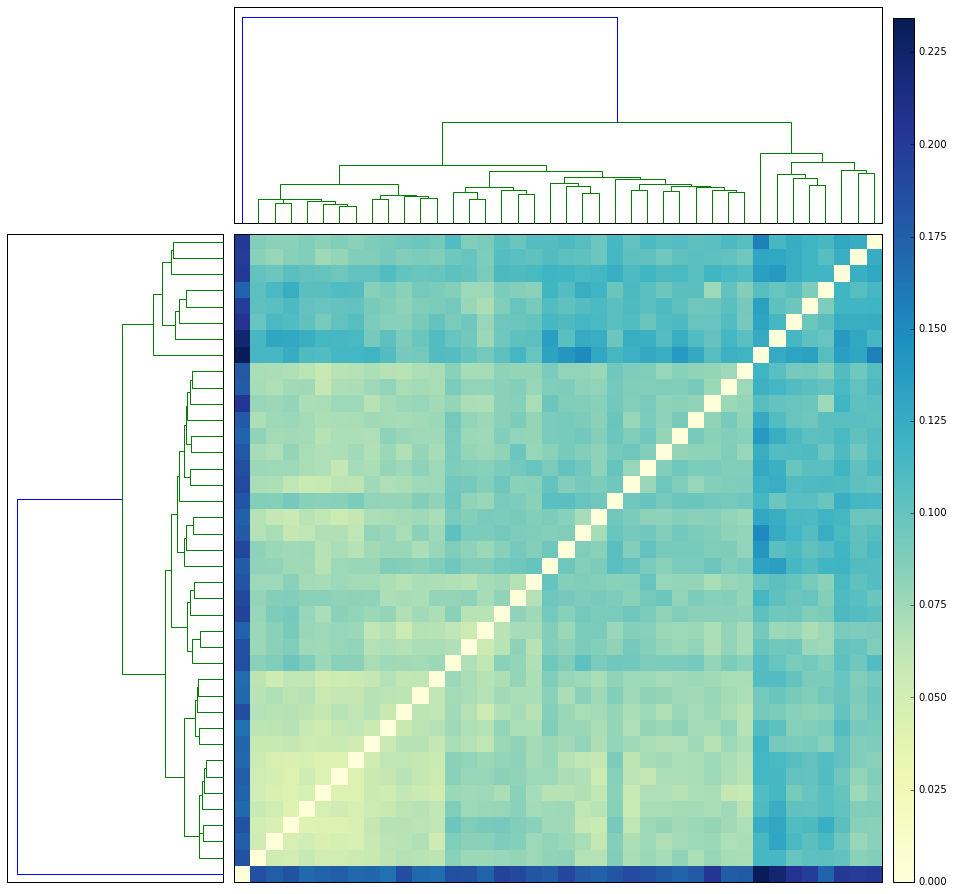

In [42]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
D = dmat2
D = noNANmat
method = 'complete'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


#Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y,leaf_rotation=90., leaf_font_size=18.,leaf_label_func=llf)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.imshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, interpolation='nearest')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
#plt.xticks(range(len(stimlabels)),np.array(list(set(stimlabels)))[idx1])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()
fig.savefig('/home/brad/B604_P01S15_Lap1_AllStims_SampleDistractor.png')

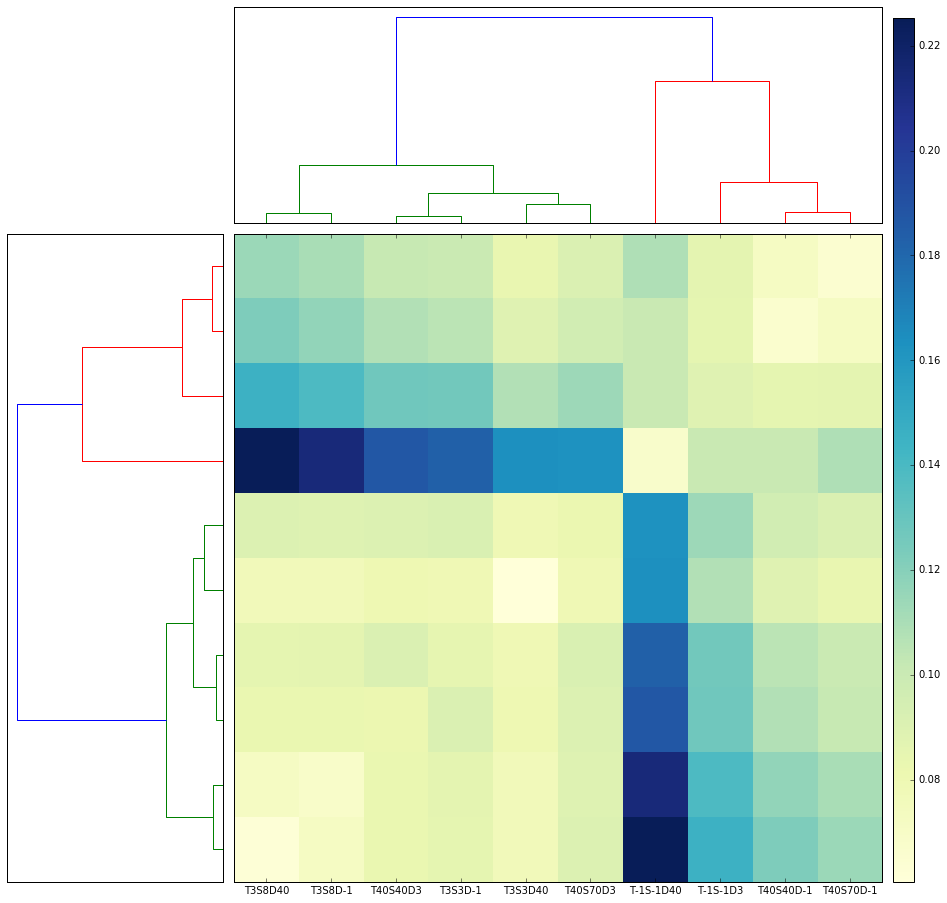

In [41]:
# Generate features and distance matrix.
D = dmat2
#D = noNANmat
method = 'ward'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


#Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y,leaf_rotation=90., leaf_font_size=18.,leaf_label_func=llf)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.imshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, interpolation='nearest')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
plt.xticks(range(10),np.array(list(set(stimlabels)))[idx1])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()
#fig.savefig('/home/brad/B604_P01S15_Lap1_AllStims_Avg10Trials_dendrogram.png')

In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
r = np.diag(np.sqrt(np.dot(pts, pts.T)))
theta = np.arctan2(pts[:, 1], pts[:, 0])


In [ ]:
lr = np.log(r)
ptsx = lr*np.cos(theta)
ptsy = lr*np.sin(theta)

In [ ]:
plt.plot(ptsx, ptsy, '.', pts[:, 0], pts[:, 1], 'r.')

In [ ]:
from scipy.cluster import hierarchy as ha

linmat = mat[np.triu_indices(len(stimtrials))]
z = ha.linkage(linmat)

In [ ]:
divsavefile = './B1235_P02S01_divsave.pkl'
with open(divsavefile, 'w') as f:
    pickle.dump(divsave, f)

In [ ]:
scgTot

In [ ]:
E = sc.simplicialChainGroups([(1,2,3)])
(t, basis) = sc.stimSpaceGraph(E, sc.boundaryOperatorMatrix(E))
print(t)
print(basis)

In [ ]:
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
sc.graphLaplacian(t)

In [ ]:
np.dot(Dgraph[1], Dgraph[1].T)
np.dot(Dgraph[0].T, Dgraph[0])

In [ ]:
(t, basis) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
print(t)
print(basis)
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [ ]:
ntrials = 5
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:2] for t in range(ntrials)]
stimtrials

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = (s1, s2)


In [ ]:
beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
        
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
#plt.clim(0, 0.5)



In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [ ]:
scg1 = sc.simplicialChainGroups([(1,2,3)])
scg2 = sc.simplicialChainGroups([(4,5,6)])
scgTot = sc.simplexUnion(scg1, scg2)
(adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
(adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
(adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
print(D1)
print(D2)

In [ ]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = []

ntrials = 5
for ind in range(ntrials):
    n = np.random.rand(15, 200)
    n = (n > 0.9).astype(int)
    maxSimpList = sorted(sc.binarytomaxsimplex(n, rDup=True))
    E = sc.simplicialChainGroups(maxSimpList)
    stimtrials.append(E)

beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        #stim1 = stimtrials[ind][0]
        #t1 = stimtrials[ind][1]
        #stim2 = stimtrials[ind2][0]
        #t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        #scg1 = scg[stim1][t1]
        #scg2 = scg[stim2][t2]
        stim1 = ind
        stim2 = ind2
        t1 = stim1
        t2 = stim2
        scg1 = stimtrials[ind]
        scg2 = stimtrials[ind2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
 

In [ ]:
       
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :], interpolation='none')
plt.clim(0, 0.5)

In [ ]:
ds = mat[np.triu_indices(len(stimtrials))]

In [ ]:
dontcare = plt.hist(ds, bins=100)

In [ ]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [ ]:
stimSimplexes = []
for stim in scg.keys():
    stimTotalSimplex = [[]]
    stimData = scg[stim]
    for trial in stimData.keys():
        #print((stim, trial))
        trialData = stimData[trial]
        stimTotalSimplex = sc.simplexUnion(stimTotalSimplex, trialData)
    stimSimplexes.append((stim, stimTotalSimplex))

beta = 0.25
divsave = []
d = 0
for ind in range(len(stimSimplexes)):
    print(ind)
    for ind2 in range(ind, len(stimSimplexes)):
        
        stim1 = stimSimplexes[ind][0]
        stim2 = stimSimplexes[ind2][0]
        scg1 = stimSimplexes[ind][1]
        scg2 = stimSimplexes[ind2][1]
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, stim2), div))

In [ ]:
mat = np.zeros((len(stimSimplexes), len(stimSimplexes)))
iu1 = np.triu_indices(len(stimSimplexes))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[1]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimSimplexes), 1))
plt.yticks(np.arange(0, len(stimSimplexes),1))
plt.savefig('/Users/brad/B1235_P02S01_0LaplacianComparisonAllTrialsUnion.pdf', format='pdf')
#plt.clim(vmin=3)

In [ ]:
for ind, stim in enumerate(scg.keys()):
    print((ind, stim))

In [ ]:
beta = 0.25
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        mE = sc.maxEnt(scgTot, d)
        
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        divtot = 0
        for d in range(3):
            
            try:
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divtot = divtot + div
            except:
                divtot = divtot+0
            
        divsave.append(((stim1, t1), (stim2, t2), divtot))

In [ ]:
d = 2

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))
#plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

# Attend High vs Attend Low Comparison

In [5]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*-correct.scg'))
print(scgfss)

scgf1 = scgfss[1]
scgf2 = scgfss[2]
print(scgf1)
print(scgf2)

with open(scgf1, 'r') as scgf:
    scg1e = pickle.load(scgf)
    
with open(scgf2, 'r') as scgf:
    scg2e = pickle.load(scgf)

['/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170407T230137Z-10.0-5.0-13.0-correct.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T233329Z-10.0-5.0-13.0-Targ-correct.scg']


In [12]:
print scg1e.keys()

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']


In [13]:
print scg2e.keys()

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']


In [87]:
indiv = ['T-1S-1D3', 'T-1S-1D40']
SD = ['T3S3D40', 'T40S40D3']
indiv2 = ['T3S3D-1','T40S40D-1' ]
attn = {'T3S3D40':'Low', 'T40S40D3':'High'}
targ = {'T-1S-1D3': 'Low', 'T-1S-1D40':'High'}
t2 = {'T40S40D-1': 'High', 'T3S3D-1': 'Low'}


In [82]:
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target'])
beta = 0.15
divsave = []
d = 1
ntrials = 10
stim1 = indiv[1]
stim2 = SD[1]
divsave = []
divsave2 = []
for stim1 in indiv:
    for stim2 in SD:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            for ind2 in range(ntrials):

                #print(stim1, t1, stim2, t2)
                scgA = scg1e[stim1][ind]
                scgB = scg2e[stim2][ind2]
        
                scgTot = sc.simplexUnion(scgA, scgB)
                mE = sc.maxEnt(scgTot, d)
        
                D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
                D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divsave.append([div, targ[stim1], attn[stim2]])
                divsave2.append([1.0/div, targ[stim1], attn[stim2]])
                mat[ind, ind2] = div
        print([stim1, stim2, np.mean(mat)])
   

0
1
2
3
4
5
6
7
8
9
['T-1S-1D3', 'T3S3D40', 0.093686117427119978]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D3', 'T40S40D3', 0.10623267664453274]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D40', 'T3S3D40', 0.079178586191725145]
0
1
2
3
4
5
6
7
8
9
['T-1S-1D40', 'T40S40D3', 0.11348485849173745]


In [83]:
             
dat = pd.DataFrame(data = divsave, columns=['Distance', 'Sample', 'Attention'])
dat2 = pd.DataFrame(data = divsave2, columns=['Distance', 'Sample', 'Attention'])

meanmat = np.mean(mat)
stdmat = np.std(mat)
print(meanmat)
print(stdmat)

0.113484858492
0.0281310628626


In [65]:
ex = sns.load_dataset('exercise')

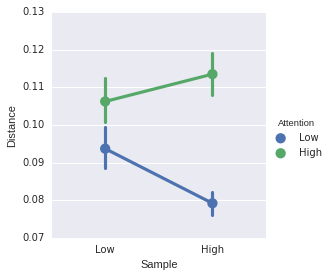

In [84]:
g = sns.factorplot(x="Sample", y="Distance", hue="Attention", data=dat)

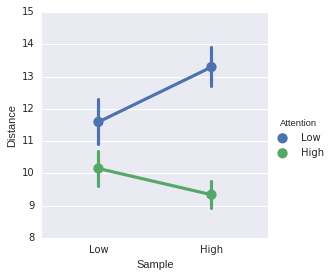

In [86]:
g = sns.factorplot(x="Sample", y="Distance", hue="Attention", data=dat2)

In [88]:
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target'])
beta = 0.15
divsave = []
d = 1
ntrials = 10
stim1 = indiv[1]
stim2 = SD[1]
divsave = []
divsave2 = []
for stim1 in indiv2:
    for stim2 in SD:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            for ind2 in range(ntrials):

                #print(stim1, t1, stim2, t2)
                scgA = scg2e[stim1][ind]
                scgB = scg2e[stim2][ind2]
        
                scgTot = sc.simplexUnion(scgA, scgB)
                mE = sc.maxEnt(scgTot, d)
        
                D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
                D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divsave.append([div, t2[stim1], attn[stim2]])
                divsave2.append([1.0/div, t2[stim1], attn[stim2]])
                mat[ind, ind2] = div
        print([stim1, stim2, np.mean(mat)])
   

0
1
2
3
4
5
6
7
8
9
['T3S3D-1', 'T3S3D40', 0.092949625383408355]
0
1
2
3
4
5
6
7
8
9
['T3S3D-1', 'T40S40D3', 0.11509679768348895]
0
1
2
3
4
5
6
7
8
9
['T40S40D-1', 'T3S3D40', 0.08276646833023292]
0
1
2
3
4
5
6
7
8
9
['T40S40D-1', 'T40S40D3', 0.1144886984841338]


# Correct vs. Incorrect, SD / Targ

In [109]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*-correct.scg'))
scginc = glob.glob(os.path.join(blockPath, 'scg/*-incorrect.scg'))


# regular
scgf1 = scgfss[1] #SD
scgf2 = scgfss[2] #Targ
scginc1 = scginc[0]
scginc2 = scginc[2]
print(scgf1)
print(scgf2)
print(scginc1)
print(scginc2)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T233329Z-10.0-5.0-13.0-Targ-correct.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T234047Z-10.0-5.0-13.0-SD-incorrect.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T235716Z-10.0-5.0-13.0-Targ-incorrect.scg


In [126]:
#shuffled
scgfss = glob.glob(os.path.join(blockPath, 'scg/*-correct-shuffle.scg'))
scginc = glob.glob(os.path.join(blockPath, 'scg/*-incorrect-shuffle.scg'))

scgf1 = scgfss[1] #SD
scgf2 = scgfss[0] #Targ
scginc1 = scginc[1]
scginc2 = scginc[0]
print(scgf1)
print(scgf2)
print(scginc1)
print(scginc2)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct-shuffle.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T233329Z-10.0-5.0-13.0-Targ-correct-shuffle.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T234047Z-10.0-5.0-13.0-SD-incorrect-shuffle.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T235716Z-10.0-5.0-13.0-Targ-incorrect-shuffle.scg


In [127]:
with open(scgf1, 'r') as scgf:
    scg1e = pickle.load(scgf)
    
with open(scgf2, 'r') as scgf:
    scg2e = pickle.load(scgf)
    
with open(scginc1, 'r') as scgf:
    scg1einc = pickle.load(scgf)
    
with open(scginc2, 'r') as scgf:
    scg2einc = pickle.load(scgf)

In [18]:
lowhi = ['T40S40D3', 'T3S3D40']
lh2 = {'T40S40D3': 'High', 'T3S3D40': 'Low'}

In [41]:
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target', 'Outcome'])
beta = 0.15
divsave = []
d = 1
ntrials = 10

divsave = []
divincsave = []
for stim1 in lowhi:
    for stim2 in lowhi:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            for ind2 in range(ntrials):

                #print(stim1, t1, stim2, t2)
                scgA = scg1e[stim1][ind] #SD
                scgB = scg2e[stim2][ind2] #Targ
                
                scgC = scg1einc[stim1][ind] #sd
                scgD = scg2einc[stim2][ind2] #targ
        
                scgTot = sc.simplexUnion(scgA, scgB)
                scgTot2 = sc.simplexUnion(scgC, scgD)
                mE = sc.maxEnt(scgTot, d)
        
                D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
                D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
                
                D1_2 = sc.maskedBoundaryOperatorMatrix(scgTot2, scgC)
                D2_2 = sc.maskedBoundaryOperatorMatrix(scgTot2, scgD)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
                L1 = sc.laplacian(D1, d)
                L2 = sc.laplacian(D2, d)
                L1_2 = sc.laplacian(D1_2, d)
                L2_2 = sc.laplacian(D2_2, d)
        
                rho1 = sc.densityMatrix(L1, beta)
                rho2 = sc.densityMatrix(L2, beta)
                rho1_2 = sc.densityMatrix(L1_2, beta)
                rho2_2 = sc.densityMatrix(L2_2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
                div = sc.JSdivergence(rho1, rho2)
                divinc = sc.JSdivergence(rho1_2, rho2_2)
                divsave.append([div, stim1, stim2, 'correct'])
                divincsave.append([divinc, stim1, stim2, 'incorrect'])
                #divsave2.append([1.0/div, targ[stim1], attn[stim2]])
                mat[ind, ind2] = div
        print([stim1, stim2, np.mean(mat)])

0
1
2
3
4
5
6
7
8
9
['T40S40D3', 'T40S40D3', 0.072120906073751337]
0
1
2
3
4
5
6
7
8
9
['T40S40D3', 'T3S3D40', 0.080809498820449063]
0
1
2
3
4
5
6
7
8
9
['T3S3D40', 'T40S40D3', 0.070389711271302488]
0
1
2
3
4
5
6
7
8
9
['T3S3D40', 'T3S3D40', 0.083212731620085731]


In [42]:
dat_correct = pd.DataFrame(data = divsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])
dat_incorrect = pd.DataFrame(data = divincsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])

stim = 'T40S40D3'

msk1 = (dat_correct['SD'] == stim) & (dat_correct['Targ'] == stim)
msk2 = (dat_incorrect['SD'] == stim) & (dat_incorrect['Targ'] == stim)
        

test = dat_correct[msk1].append(dat_incorrect[msk2])

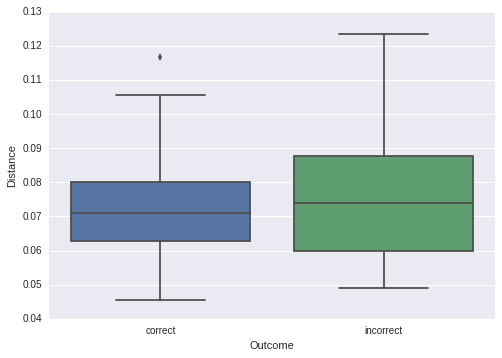

In [44]:
import seaborn as sns
g = sns.boxplot(x="Outcome", y="Distance", data=test)

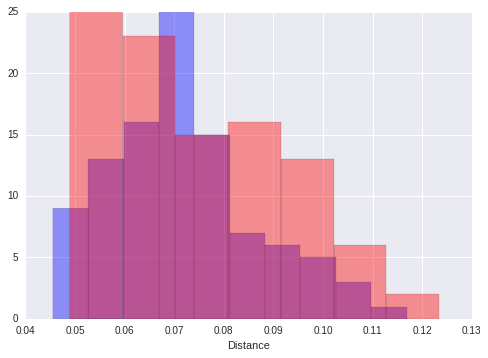

In [46]:
plt.figure()
sns.distplot(dat_correct[msk1]['Distance'], color='b', kde=False)
sns.distplot(dat_incorrect[msk2]['Distance'], color='r', kde=False)

In [91]:
#within trials comparison

import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target', 'Outcome'])
beta = 0.15
divsave = []
d = 1
ntrials = 18

divsave = []
divincsave = []
lowhi = ['T40S40D3']
for stim1 in lowhi:
    for stim2 in lowhi:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            #print(stim1, t1, stim2, t2)
            scgA = scg1e[stim1][ind] #SD
            scgB = scg2e[stim2][ind] #Targ
                
            scgC = scg1einc[stim1][ind] #sd
            scgD = scg2einc[stim2][ind] #targ
        
            scgTot = sc.simplexUnion(scgA, scgB)
            scgTot2 = sc.simplexUnion(scgC, scgD)
            mE = sc.maxEnt(scgTot, d)
        
            D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scgA)
            D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scgB)
                
            D1_2 = sc.maskedBoundaryOperatorMatrix(scgTot2, scgC)
            D2_2 = sc.maskedBoundaryOperatorMatrix(scgTot2, scgD)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
            L1 = sc.laplacian(D1, d)
            L2 = sc.laplacian(D2, d)
            L1_2 = sc.laplacian(D1_2, d)
            L2_2 = sc.laplacian(D2_2, d)
        
            rho1 = sc.densityMatrix(L1, beta)
            rho2 = sc.densityMatrix(L2, beta)
            rho1_2 = sc.densityMatrix(L1_2, beta)
            rho2_2 = sc.densityMatrix(L2_2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
            div = sc.JSdivergence(rho1, rho2)
            divinc = sc.JSdivergence(rho1_2, rho2_2)
            divsave.append([div, stim1, stim2, 'correct'])
            divincsave.append([divinc, stim1, stim2, 'incorrect'])
                #divsave2.append([1.0/div, targ[stim1], attn[stim2]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


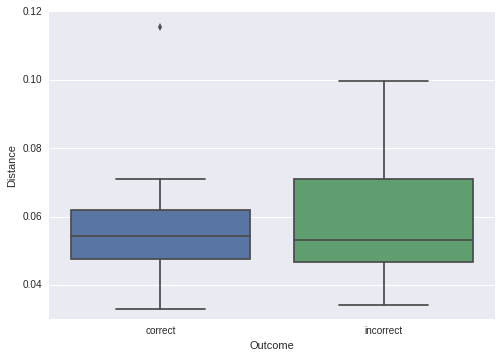

In [92]:
stim = 'T40S40D3'
dat_correct = pd.DataFrame(data = divsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])
dat_incorrect = pd.DataFrame(data = divincsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])
msk1 = (dat_correct['SD'] == stim) & (dat_correct['Targ'] == stim)
msk2 = (dat_incorrect['SD'] == stim) & (dat_incorrect['Targ'] == stim)
        

test = dat_correct[msk1].append(dat_incorrect[msk2])
import seaborn as sns
g = sns.boxplot(x="Outcome", y="Distance", data=test)

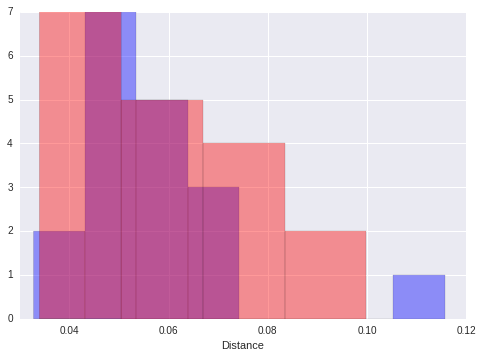

In [107]:
plt.figure()
sns.distplot(dat_correct[msk1]['Distance'], color='b', kde=False)
sns.distplot(dat_incorrect[msk2]['Distance'], color='r', kde=False)

In [93]:
len(scg2e['T40S40D3'])

32

# Plot Entropy as a function of beta

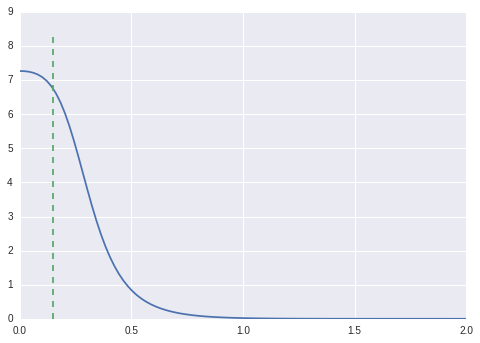

In [106]:
betas = np.linspace(0.0001, 2, 100)
ents = []
trial = 1
scg = scg1e[stim][trial]
D = sc.boundaryOperatorMatrix(scg)
d = 1
L = sc.laplacian(D, d)
b0 = 0.15
for beta in betas:
    rho = sc.densityMatrix(L, beta)
    ents.append(-sc.Entropy(rho))
    
plt.plot(betas, ents)
plt.plot([b0, b0], [0, max(ents)+1], '--')

# New comparison method

In [128]:
#within trials comparison
reload(sc)
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target', 'Outcome'])
beta = 0.15
divsave = []
d = 1
ntrials = 18

divsave = []
divincsave = []
lowhi = ['T40S40D3']
for stim1 in lowhi:
    for stim2 in lowhi:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            #print(stim1, t1, stim2, t2)
            scgA = scg1e[stim1][ind] #SD
            scgB = scg2e[stim2][ind] #Targ
                
            scgC = scg1einc[stim1][ind] #sd
            scgD = scg2einc[stim2][ind] #targ
        
            DA = sc.boundaryOperatorMatrix(scgA)
            DB = sc.boundaryOperatorMatrix(scgB)
            DC = sc.boundaryOperatorMatrix(scgC)
            DD = sc.boundaryOperatorMatrix(scgD)
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
            LA = sc.laplacian(DA, d)
            LB = sc.laplacian(DB, d)
            LC = sc.laplacian(DC, d)
            LD = sc.laplacian(DD, d)
            
            (LA, LB) = sc.reconcile_laplacians(LA, LB)
            (LC, LD) = sc.reconcile_laplacians(LC, LD)
        
            rho1 = sc.densityMatrix(LA, beta)
            rho2 = sc.densityMatrix(LB, beta)
            rho1_2 = sc.densityMatrix(LC, beta)
            rho2_2 = sc.densityMatrix(LD, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
            div = sc.JSdivergence(rho1, rho2)
            divinc = sc.JSdivergence(rho1_2, rho2_2)
            divsave.append([div, stim1, stim2, 'correct'])
            divincsave.append([divinc, stim1, stim2, 'incorrect'])
                #divsave2.append([1.0/div, targ[stim1], attn[stim2]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


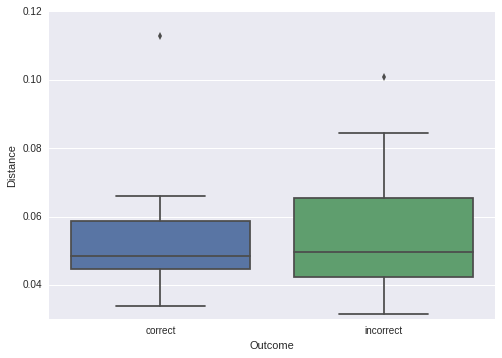

In [129]:
stim = 'T40S40D3'
dat_correct = pd.DataFrame(data = divsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])
dat_incorrect = pd.DataFrame(data = divincsave, columns=['Distance', 'SD', 'Targ', 'Outcome'])
msk1 = (dat_correct['SD'] == stim) & (dat_correct['Targ'] == stim)
msk2 = (dat_incorrect['SD'] == stim) & (dat_incorrect['Targ'] == stim)
        

test = dat_correct[msk1].append(dat_incorrect[msk2])
import seaborn as sns
g = sns.boxplot(x="Outcome", y="Distance", data=test)

# Active vs. Passive

In [23]:
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'

scgfss = glob.glob(os.path.join(blockPath, 'scg/*-correct-shuffle.scg'))
scginc = glob.glob(os.path.join(blockPath, 'scg/*-incorrect-shuffle.scg'))
scgSDactive = glob.glob(os.path.join(blockPath, 'scg/*-SD-active.scg'))
scgTargactive = glob.glob(os.path.join(blockPath, 'scg/*-Targ-active.scg'))
scgSDpassive = glob.glob(os.path.join(blockPath, 'scg/*-SD-passive.scg'))
scgTargpassive = glob.glob(os.path.join(blockPath, 'scg/*-Targ-passive.scg'))

scgf1 = scgSDactive[0] #SD
scgf2 = scgTargactive[0] #Targ
scginc1 = scgSDpassive[0]
scginc2 = scgTargpassive[0]
print(scgf1)
print(scgf2)
print(scginc1)
print(scginc2)

with open(scgf1, 'r') as scgf:
    scg1e = pickle.load(scgf)
    
with open(scgf2, 'r') as scgf:
    scg2e = pickle.load(scgf)
    
with open(scginc1, 'r') as scgf:
    scg1einc = pickle.load(scgf)
    
with open(scginc2, 'r') as scgf:
    scg2einc = pickle.load(scgf)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170419T232127Z-10.0-5.0-13.0-SD-active.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170419T232209Z-10.0-5.0-13.0-Targ-active.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170419T232252Z-10.0-5.0-13.0-SD-passive.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170419T232321Z-10.0-5.0-13.0-Targ-passive.scg


In [24]:
scg1e.keys()

[u'T40S40D3',
 u'T3S8D40',
 u'T3S3D-1',
 u'T40S70D-1',
 u'T3S3D40',
 u'T40S70D3',
 u'T3S8D-1',
 u'T40S40D-1']

In [34]:
#within trials comparison
reload(sc)
reload(sa)
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target', 'Outcome'])
beta = 0.15
divsave = []
d = 1
ntrials = 18

divsave = []
divincsave = []
lowhi = ['T3S3D40']
for stim1 in lowhi:
    for stim2 in lowhi:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            #print(stim1, t1, stim2, t2)
            scgA = scg1e[stim1][ind] #SD
            scgB = scg2e[stim2][ind] #Targ
                
            scgC = scg1einc[stim1][ind] #sd
            scgD = scg2einc[stim2][ind] #targ
            div = sa.compute_JS_expanded(scgA, scgB, d, beta)
            divinc = sa.compute_JS_expanded(scgC, scgD, d, beta)
            divsave.append([div, stim1, stim2, 'Active'])
            divincsave.append([divinc, stim1, stim2, 'Passive'])
                #divsave2.append([1.0/div, targ[stim1], attn[stim2]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


T3S3D40


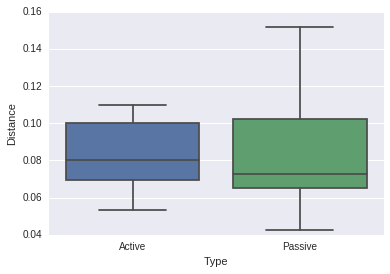

In [35]:
stim = lowhi[0]
print(stim)
dat_correct = pd.DataFrame(data = divsave, columns=['Distance', 'SD', 'Targ', 'Type'])
dat_incorrect = pd.DataFrame(data = divincsave, columns=['Distance', 'SD', 'Targ', 'Type'])
msk1 = (dat_correct['SD'] == stim) & (dat_correct['Targ'] == stim)
msk2 = (dat_incorrect['SD'] == stim) & (dat_incorrect['Targ'] == stim)
        

test = dat_correct[msk1].append(dat_incorrect[msk2])
import seaborn as sns
g = sns.boxplot(x="Type", y="Distance", data=test)

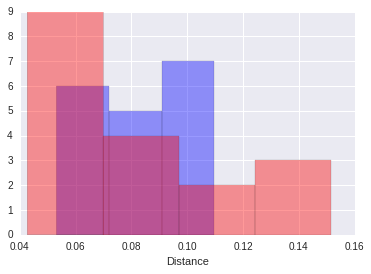

In [36]:
plt.figure()
sns.distplot(dat_correct[msk1]['Distance'], color='b', kde=False)
sns.distplot(dat_incorrect[msk2]['Distance'], color='r', kde=False)

In [87]:
reload(sa)
def JS_vs_beta(beta, stim):
    divsave = []
    divincsave = []
    diffsave = []
    ntrials = min([len(scg1e[stim]), len(scg2e[stim]), len(scg1einc[stim]), len(scg2einc[stim])])
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scg1e[stim][ind] #SD
        scgB = scg2e[stim][ind] #Targ
                
        scgC = scg1einc[stim][ind] #sd
        scgD = scg2einc[stim][ind] #targ
        div = sa.compute_JS_expanded(scgA, scgB, d, beta)
        divinc = sa.compute_JS_expanded(scgC, scgD, d, beta)
        divsave.append(float(div))
        divincsave.append(float(divinc))
        diffsave.append(div)
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)
    m2 = np.mean(divincsave)
    sd2 = np.std(divincsave)

    return [[m1, sd1], [m2, sd2]]

def entropy_beta(beta, stim):
    
    ntrials = min([len(scg1e[stim]), len(scg2e[stim]), len(scg1einc[stim]), len(scg2einc[stim])])
    entsave = np.zeros((ntrials, 4))
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scg1e[stim][ind] #SD
        scgB = scg2e[stim][ind] #Targ
                
        scgC = scg1einc[stim][ind] #sd
        scgD = scg2einc[stim][ind] #targ
        
        entA = sa.compute_entropy(scgA, d, beta)
        entB = sa.compute_entropy(scgB, d, beta)
        entC = sa.compute_entropy(scgC, d, beta)
        entD = sa.compute_entropy(scgD, d, beta)
        entsave[ind, :] = np.array([entA, entB, entC, entD])
    entmean = np.mean(entsave, axis=0)
    return entmean

In [49]:
print(scg1e.keys())
print(scg2e.keys())
print(scg1einc.keys())
print(scg2einc.keys())

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']


In [63]:
print(([len(scg1e[stim]), len(scg2e[stim]), len(scg1einc[stim]), len(scg2einc[stim])]))


[51, 51, 30, 30]


In [77]:
import tqdm
stim = 'T3S8D40'
stims = scg1e.keys()
betas = np.linspace(0.001, 1,20)

msdActSave = []
msdPassSave = []
for stim in stims:
    print(stim)
    msdAct = []
    msdPass = []
    for beta in tqdm.tqdm(betas):
        msd1, msd2 = JS_vs_beta(beta, stim)
        msdAct.append(msd1)
        msdPass.append(msd2)
    msdActSave.append((msdAct, stim))
    msdPassSave.append((msdPass, stim))

  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


100%|██████████| 20/20 [00:40<00:00,  2.10s/it]


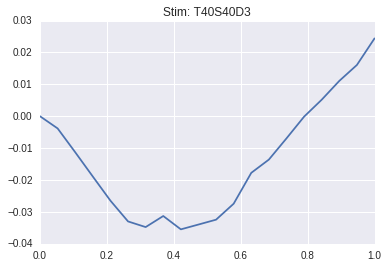

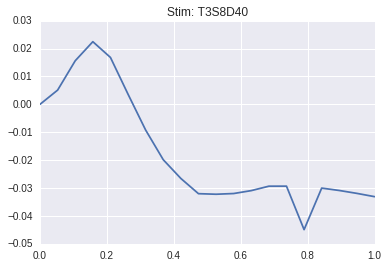

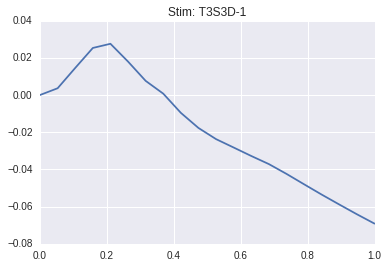

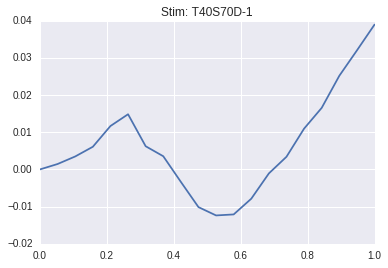

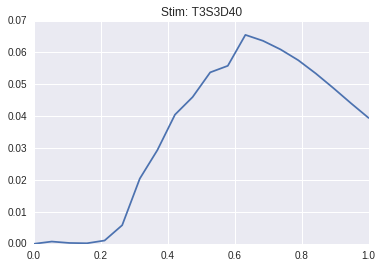

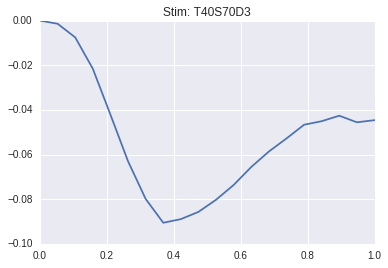

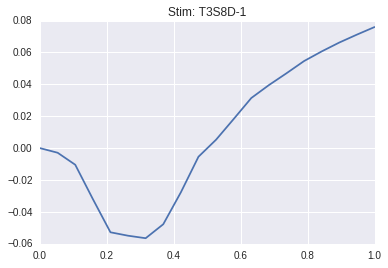

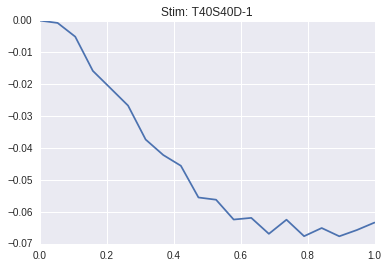

In [83]:
for a,b in zip(msdActSave, msdPassSave):
    tact, stim = a
    tpass, stim = b
    plt.figure()
    tact = np.array(tact)[:, 0]
    tpass = np.array(tpass)[:, 0]
    ttot = tact-tpass
    plt.plot(betas, ttot)
    plt.title('Stim: {}'.format(stim))

In [111]:
import tqdm
stim = 'T3S8D40'
stims = scg1e.keys()
betas = np.linspace(0.001, 2,40)
AllStimEnt = []
for stim in stims:
    print(stim)
    entsave = []
    for beta in tqdm.tqdm(betas):
        entmean = entropy_beta(beta, stim)
        entsave.append(entmean)
    AllStimEnt.append((entsave, stim))

  0%|          | 0/40 [00:00<?, ?it/s]

T40S40D3


  0%|          | 0/40 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/40 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/40 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/40 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/40 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/40 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/40 [00:00<?, ?it/s]

T40S40D-1


100%|██████████| 40/40 [00:51<00:00,  1.18s/it]


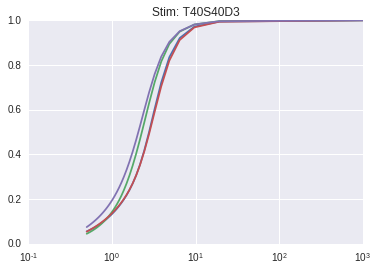

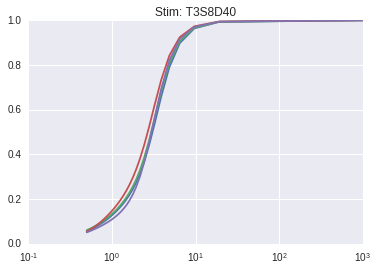

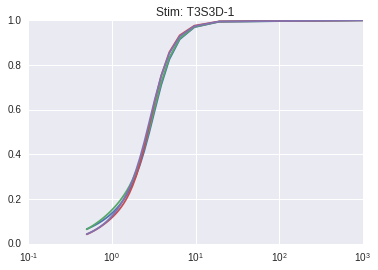

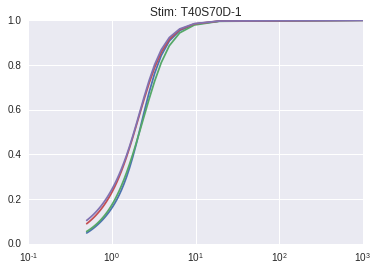

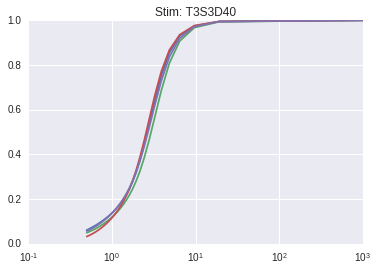

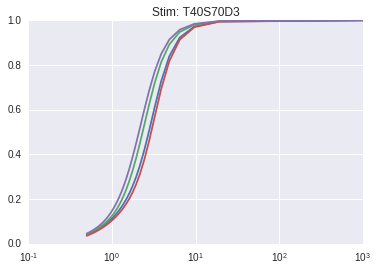

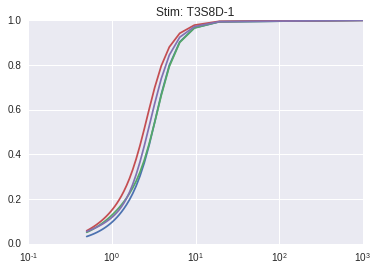

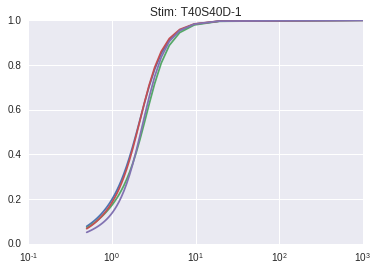

In [112]:
for a in AllStimEnt:
    entact, stim = a
    plt.figure()
    entact = -np.array(entact)
    mE = np.nanmax(entact, axis=0)
    
    mE = np.tile(mE[np.newaxis, :].T, (1, 40)).T
    plt.semilogx(1.0/betas, np.divide(entact, mE))
    plt.plot([0, 1000], [0.1, 0.1], '--')
    plt.ylim([0, 1])
    plt.title('Stim: {}'.format(stim))
    
    plt.savefig('B604_P01S15_TargSD_')

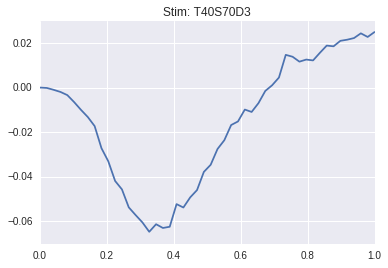

In [42]:
plt.plot(betas, tact[:, 0] - tpass[:, 0])
plt.title('Stim: {}'.format(stim))

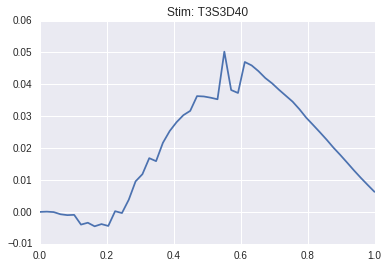

In [45]:
plt.plot(betas, tact[:, 0] - tpass[:, 0])
plt.title('Stim: {}'.format(stim))

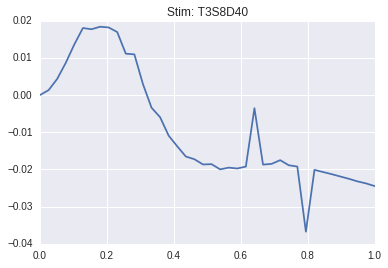

In [48]:
plt.plot(betas, tact[:, 0] - tpass[:, 0])
plt.title('Stim: {}'.format(stim))

In [54]:
tstddiff = np.sqrt(np.square(tact[:, 1]) + np.square(tpass[:, 1]))

<Container object of 3 artists>

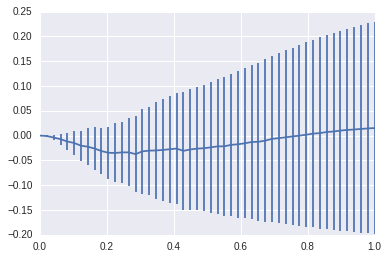

In [55]:
plt.errorbar(betas, tact[:, 0] - tpass[:, 0], yerr=tstddiff)

# Wide vs. Narrow

In [15]:
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'

scgfss = glob.glob(os.path.join(blockPath, 'scg/*-correct-wide.scg'))
scginc = glob.glob(os.path.join(blockPath, 'scg/*-incorrect-shuffle.scg'))
scgSDcorrect_wide = glob.glob(os.path.join(blockPath, 'scg/*-SD-correct-wide.scg'))
scgTargcorrect_wide = glob.glob(os.path.join(blockPath, 'scg/*-Targ-correct-wide.scg'))
scgSDincorrect_wide = glob.glob(os.path.join(blockPath, 'scg/*-SD-incorrect-wide.scg'))
scgTargincorrect_wide = glob.glob(os.path.join(blockPath, 'scg/*-Targ-incorrect-wide.scg'))

scgf1 = scgSDcorrect_wide[0] #SD
scgf2 = scgTargcorrect_wide[0] #Targ
scginc1 = scgSDincorrect_wide[0]
scginc2 = scgTargincorrect_wide[0]
print(scgf1)
print(scgf2)
print(scginc1)
print(scginc2)

with open(scgf1, 'r') as scgf:
    scg1e = pickle.load(scgf)
    
with open(scgf2, 'r') as scgf:
    scg2e = pickle.load(scgf)
    
with open(scginc1, 'r') as scgf:
    scg1einc = pickle.load(scgf)
    
with open(scginc2, 'r') as scgf:
    scg2einc = pickle.load(scgf)

/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct-wide.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170421T223233Z-10.0-5.0-13.0-Targ-correct-wide.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T234047Z-10.0-5.0-13.0-SD-incorrect-wide.scg
/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170426T163234Z-10.0-5.0-13.0-Targ-incorrect-wide.scg


In [21]:
scg2einc.keys()


[]

In [16]:
#within trials comparison
reload(sc)
reload(sa)
import pandas as pd
dat = pd.DataFrame(columns=['Distance', 'Attention', 'Target', 'Outcome'])
beta = 0.15
divsave = []
d = 1
ntrials = 18

divsave = []
divincsave = []
lowhi = ['T40S40D3']
for stim1 in lowhi:
    for stim2 in lowhi:
        
        mat = np.zeros((ntrials, ntrials))
        for ind in range(ntrials):
            print(ind)
            #print(stim1, t1, stim2, t2)
            scgA = scg1e[stim1][ind] #SD
            scgB = scg2e[stim2][ind] #Targ
                
            scgC = scg1einc[stim1][ind] #sd
            scgD = scg2einc[stim2][ind] #targ
            div = sa.compute_JS_expanded(scgA, scgB, d, beta)
            divinc = sa.compute_JS_expanded(scgC, scgD, d, beta)
            divsave.append([div, stim1, stim2, 'Correct'])
            divincsave.append([divinc, stim1, stim2, 'Incorrect'])
                #divsave2.append([1.0/div, targ[stim1], attn[stim2]])

0


KeyError: 'T40S40D3'

In [14]:
%%time
import csv
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
thresh = 13.0
bf = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/binned_data/win-10.0_dtovr-5.0_cg-Good-MUA_seg-0-0/20170419T231727Z-10.0-5.0.binned'
with h5.File(bf, 'r') as f:
    poptens = np.array(f['T40S40D3']['pop_tens'])
    popmat = poptens[:, :, 2]
    t = sc.binnedtobinary(popmat, thresh)
    q = sc.binarytomaxsimplex(t,rDup=True)
    with open('/home/brad/sctest.csv', 'wb') as f2:
        cw = csv.writer(f2, delimiter=',')
        for qi in q:
            if len(qi) >0:
                cw.writerow(qi)
                

sc.simplicialChainGroups(q)

CPU times: user 1.89 s, sys: 133 ms, total: 2.03 s
Wall time: 1.99 s


In [156]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)

{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-correct.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg', 'Targ-incorrect.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-correct.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg', 'SD-incorrect.scg']}


In [165]:
reload(sa)
reload(sc)
def JS_vs_beta(beta, stim, scgSD, scgT):
    divsave = []
    divincsave = []
    diffsave = []
    ntrials = min([len(scgSD[stim]), len(scgT[stim])])
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scgSD[stim][ind] #SD
        scgB = scgT[stim][ind] #Targ
        div = sa.compute_JS_expanded(scgA, scgB, d, beta)
        divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return [m1, sd1]

def entropy_beta(beta, stim):
    
    ntrials = min([len(scg1e[stim]), len(scg2e[stim]), len(scg1einc[stim]), len(scg2einc[stim])])
    entsave = np.zeros((ntrials, 4))
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scg1e[stim][ind] #SD
        scgB = scg2e[stim][ind] #Targ
                
        scgC = scg1einc[stim][ind] #sd
        scgD = scg2einc[stim][ind] #targ
        
        entA = sa.compute_entropy(scgA, d, beta)
        entB = sa.compute_entropy(scgB, d, beta)
        entC = sa.compute_entropy(scgC, d, beta)
        entD = sa.compute_entropy(scgD, d, beta)
        entsave[ind, :] = np.array([entA, entB, entC, entD])
    entmean = np.mean(entsave, axis=0)
    return entmean

In [ ]:
AllSave = {}
for tc, sdc in zip(fnames['Targ'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgSD = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgT = pickle.load(scgf)
    stims = scgSD.keys()
    print(stims)
    stims2 = scgT.keys()
    print(stims2)
    betas = np.linspace(0.001, 1,20)

    msdActSave = {}
    msdPassSave = []
    for stim in stims:
        print(stim)
        msdAct = []
        msdPass = []
        for beta in tqdm.tqdm(betas):
            msd1 = JS_vs_beta(beta, stim, scgSD, scgT)
            msdAct.append(msd1)
        msdActSave[stim] = msdAct
    AllSave[tc] = msdActSave

  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-correct-wide.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3
T3S8D40


 70%|███████   | 14/20 [00:00<00:00, 138.06it/s]

T3S3D-1
T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40
T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1
T40S40D-1


100%|██████████| 20/20 [00:00<00:00, 144.46it/s]


('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170418T232727Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-correct-narrow.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


 30%|███       | 6/20 [00:29<01:10,  5.05s/it]

In [122]:
os.path.join(blockPath, 'scg/*'+sdc)

'/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/*SD-active-wide.scg'

In [152]:
t = sc.boundaryOperatorMatrix(scgA)
l = sc.laplacian(t, 1)

In [153]:
l.shape

(184, 184)